In [1]:
from sklearn.preprocessing import StandardScaler
from pandas import get_dummies, concat, read_json
from matplotlib.pyplot import hist, show, boxplot, subplots
from numpy import arange, argmax
from sklearn.ensemble import RandomForestClassifier
# import numpy as np
import seaborn as sns
from numpy import arange, argmax
import pandas as pd
from pathlib import Path
import gc
import datetime
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("otto_training_data.csv")
print(df.head(10))

   session      aid             ts  type
0   100000  1498214  1659326712113     0
1   100000  1617298  1659445460457     0
2   100000  1617298  1659445471474     1
3   100000  1820189  1659445496027     0
4   100000  1619534  1661072158119     0
5   100000    22770  1661076416668     0
6   100000    22770  1661076452638     0
7   100000    22770  1661076458938     1
8   100000   339965  1661076485171     0
9   100000   339965  1661076499914     1


In [3]:
# Shorten data set 
newData = df.loc[(df['session'] == 100000)| (df['session'] == 100002) | (df['session'] == 100003) | (df['session'] == 100004) | (df['session'] == 100005)]
newData = df.to_csv("Otto_sample_data.csv")

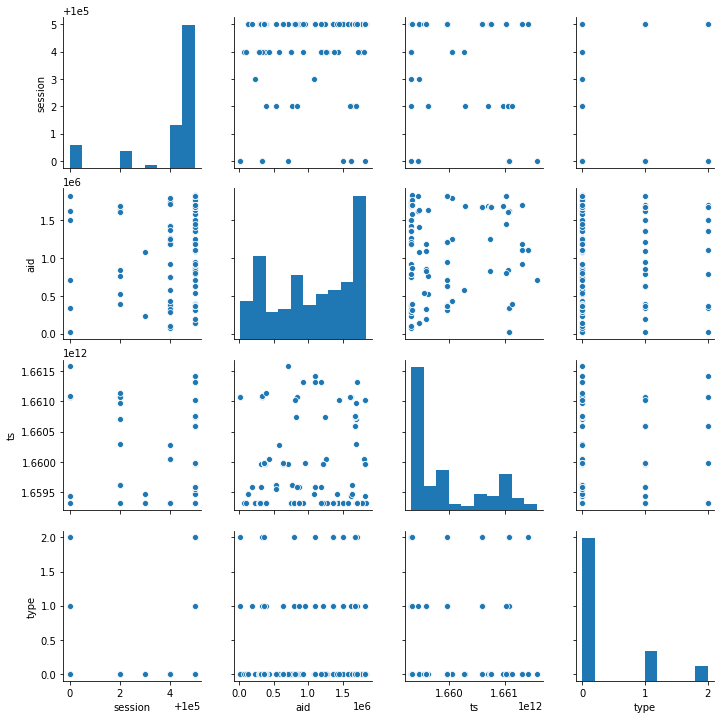

In [8]:
sns.pairplot(newData[['session', 'aid', 'ts', 'type']])

In [9]:
# K- means Clustering
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(newData[['aid', 'ts']])
kmeans.cluster_centers_
## Attach Cluster to Original Data
newData['Clusters'] = kmeans.labels_
newData.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,session,aid,ts,type,Clusters
0,100000,1498214,1659326712113,0,0
1,100000,1617298,1659445460457,0,4
2,100000,1617298,1659445471474,1,4
3,100000,1820189,1659445496027,0,4
4,100000,1619534,1661072158119,0,1
5,100000,22770,1661076416668,0,1
6,100000,22770,1661076452638,0,1
7,100000,22770,1661076458938,1,1
8,100000,339965,1661076485171,0,1
9,100000,339965,1661076499914,1,1


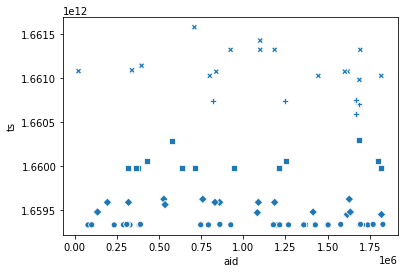

In [10]:
newData['Clusters'].value_counts() 
#plot
sns.scatterplot(x="aid", y="ts", style="Clusters", legend = False, data=newData);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


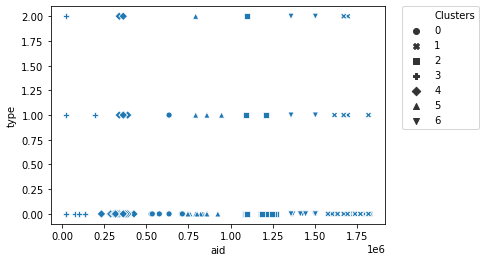

In [11]:
# K- means Clustering for aid and type
kmeans = cluster.KMeans(n_clusters=7, init="k-means++")
kmeans = kmeans.fit(newData[['aid', 'type']], newData[['session']])
kmeans.cluster_centers_
## Attach Cluster to Original Data
newData['Clusters'] = kmeans.labels_
newData.head(10)

newData['Clusters'].value_counts() 
#plot
sns.scatterplot(x="aid", y="type", style="Clusters", data=newData)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [29]:
from sklearn.neighbors import KNeighborsClassifier
X = newData[['ts', 'type']]
y = newData[['aid']]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.5099337748344371


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [13]:
# Split Data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.06557377049180328


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2786885245901639
0.19672131147540983


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

[0.19672131147540983, 0.2459016393442623, 0.36065573770491804, 0.3114754098360656, 0.2786885245901639, 0.2786885245901639, 0.2786885245901639, 0.2786885245901639, 0.26229508196721313, 0.29508196721311475, 0.29508196721311475, 0.29508196721311475, 0.29508196721311475, 0.29508196721311475, 0.29508196721311475, 0.2786885245901639, 0.2459016393442623, 0.26229508196721313, 0.26229508196721313, 0.2459016393442623, 0.2459016393442623, 0.2459016393442623, 0.18032786885245902, 0.18032786885245902, 0.18032786885245902]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

Text(0, 0.5, 'Testing Accuracy')

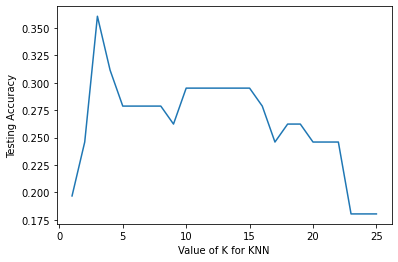

In [17]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
## DONE WITH KNN and Log Regession

In [28]:
dtc = DecisionTreeClassifier(min_samples_split=5, random_state=0)

dtc.fit(X_train, y_train)

y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.3114754098360656